# HydroRIVERS and HydroLAKES

# Import libraries

In [1]:
import arcpy
from arcpy.sa import*
from arcpy.ia import*
from arcgis.raster.functions import *

# connect to GIS
from arcgis.gis import GIS
from arcgis.geometry import SpatialReference

import pandas as pd
import os
from copy import deepcopy

# Login in ArcGIS Online

In [3]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: Camendezv_UDFJC
Enter your password: ········


# Import the Colombia boundary

<div class="alert alert-info">
    <b>World Countries Generalized:</b> 

World Countries Generalized represents generalized boundaries for the countries of the world as of August 2022. The generalized political boundaries improve draw performance and effectiveness at a global or continental level. This layer is best viewed out beyond a scale of 1:5,000,000.
    
For more information, please visit the following link:[World Countries Generalized](https://hub.arcgis.com/datasets/esri::world-countries-generalized/about)

</div>


In [5]:
new_path = os.chdir(r'C:/Users/57320/Dropbox/Mi PC (LAPTOP-5K2HI422)/Desktop/Article Water Resources/World_Countries_(Generalized)')
new_path = os.getcwd()
new_path

'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\World_Countries_(Generalized)'

In [6]:
World_boundary = r"World_Countries_Generalized.shp"
boundaries = pd.DataFrame.spatial.from_featureclass(os.path.join(new_path, World_boundary), sr=SpatialReference(4326).as_arcpy)
boundaries.drop(labels=["ISO","COUNTRYAFF", "AFF_ISO"], axis=1, inplace=True)
boundaries

,FID,COUNTRY,SHAPE
0,0,Afghanistan,"{""rings"": [[[61.27655419005816, 35.60724507982..."
1,1,Albania,"{""rings"": [[[19.570827072949953, 41.6852732197..."
2,2,Algeria,"{""rings"": [[[4.603354061126424, 36.88790902877..."
3,3,American Samoa,"{""rings"": [[[-170.74390000440516, -14.37555495..."
4,4,Andorra,"{""rings"": [[[1.4458361408305793, 42.6019449756..."
...,...,...,...
246,246,Vietnam,"{""rings"": [[[107.07896331770007, 17.1080360327..."
247,247,Wallis and Futuna,"{""rings"": [[[-178.06081802883446, -14.32389091..."
248,248,Yemen,"{""rings"": [[[47.25444519463059, 13.61528205001..."
249,249,Zambia,"{""rings"": [[[30.213018093021223, -14.981717930..."


In [7]:
# select the Colombia boundary
boundary_col = boundaries.loc[boundaries.COUNTRY == 'Colombia']
boundary_col

,FID,COUNTRY,SHAPE
50,50,Colombia,"{""rings"": [[[-74.86080882326962, 11.1254911813..."


In [8]:
arcpy.conversion.ExportFeatures(
    in_features=r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\World_Countries_(Generalized)\World_Countries_Generalized.shp",
    out_features=r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\WaterResources\ColombiaBoundary.shp",
    where_clause="COUNTRY = 'Colombia'",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping=r'COUNTRY "COUNTRY" true true false 50 Text 0 0,First,#,C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\World_Countries_(Generalized)\World_Countries_Generalized.shp,COUNTRY,0,49',
    sort_field=None
)

<Result 'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\WaterResources\\ColombiaBoundary.shp'>

In [9]:
# View the colombia boundary
map1 = gis.map("Bogotá", 4)
map1.center = [5, -74]
map1.add_layer(boundary_col)
map1.basemap = 'hybrid'
map1

MapView(layout=Layout(height='400px', width='100%'))

# Import the Colombia boundary using ArcGIS Online

<Item title:"World Countries" type:Feature Layer Collection owner:esri_dm>
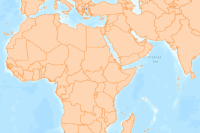

In [12]:
World_countries = gis.content.search("title:World Countries", item_type="Feature Layer", outside_org=True)[0]
World_countries

In [13]:
# Obtain the first feature layer from the item
world = World_countries.layers[0]
# Use the `from_layer` static method in the 'spatial' namespace on the Pandas' DataFrame
colombia_bound = pd.DataFrame.spatial.from_layer(world)
colombia_bound

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Area,Shape__Length,SHAPE
0,1,Afghanistan,AFG,Asia,Primary land,5,Afghanistan,934790415800.394531,7151402.238038,"{""rings"": [[[7903664.31238816, 4647353.7240337..."
1,2,Albania,ALB,Europe,Primary land,5,Albania,50740452537.506836,1661876.953052,"{""rings"": [[[2198549.63224664, 5255559.6253894..."
2,3,Albania,ALB,Europe,Very small island,1,Albania,957139.551758,9913.23004,"{""rings"": [[[2225504.39373069, 4833346.5908909..."
3,4,Albania,ALB,Europe,Small island,2,Albania,12487236.617188,22317.303968,"{""rings"": [[[2146282.76187501, 4939350.3288305..."
4,5,Algeria,DZA,Africa,Small island,2,Algeria,912158.337708,5281.894285,"{""rings"": [[[-125686.175298773, 4262793.12704]..."
...,...,...,...,...,...,...,...,...,...,...
646,647,Yemen,YEM,Asia,Very small island,1,Yemen,11264806.4375,128476.33536,"{""rings"": [[[5803828.60369869, 1395645.8988727..."
647,648,Yemen,YEM,Asia,Small island,2,Yemen,722943493.397461,803570.607099,"{""rings"": [[[5931926.38051852, 1360057.7950083..."
648,649,Yemen,YEM,Asia,Medium island,3,Yemen,3809938000.283691,353260.952457,"{""rings"": [[[5960626.66656088, 1426907.7722898..."
649,650,Zambia,ZMB,Africa,Primary land,5,Zambia,800213841259.233643,6306988.97471,"{""rings"": [[[3461259.839501, -964526.127554421..."


In [14]:
colombia = colombia_bound.query('(COUNTRY == "Colombia") and (LAND_TYPE == "Primary land")')
colombia

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Area,Shape__Length,SHAPE
123,124,Colombia,COL,South America,Primary land,5,Colombia,1151528507344.773193,12676584.785491,"{""rings"": [[[-8731105.95122992, 280260.0783608..."


In [15]:
# View the colombia boundary
map2 = gis.map("Bogotá", 4)
map2.center = [5, -74]
map2.add_layer(colombia)
map2.basemap = 'hybrid'
map2

MapView(layout=Layout(height='400px', width='100%'))

# Import the HydroLAKES in Colombia

<div class="alert alert-info">
    <b>HydroLAKES:</b> 

HydroLAKES aims to provide the shoreline polygons of all global lakes with a surface area of at least 10 ha. HydroLAKES has been developed using a suite of auxiliary data sources of lake polygons and gridded lake surface areas. All lakes are co-registered to the global river network of the HydroSHEDS database via their lake pour points. The global coverage of HydroLAKES encompasses 1.4 million individual lakes or reservoirs representing a total surface area of 2.67 million km², a total shoreline length of 7.2 million km, and a total storage volume of 181,900 km.
        
For more information, please visit the following link:[HydroLAKES](https://www.hydrosheds.org/products/hydrolakes) 

</div>

In [16]:
arcpy.analysis.Intersect(
    in_features=r"'C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\HydroLAKES_polys_v10_shp\HydroLAKES_polys_v10_shp\HydroLAKES_polys_v10.shp' #;'C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\WaterResources\ColombiaBoundary.shp' #",
    out_feature_class=r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\WaterResources\LakesColombia.shp",
    join_attributes="ALL",
    cluster_tolerance=None,
    output_type="INPUT"
)

<Result 'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\WaterResources\\LakesColombia.shp'>

In [17]:
path_lakes = os.chdir(r'C:/Users/57320/Dropbox/Mi PC (LAPTOP-5K2HI422)/Desktop/Article Water Resources/WaterResources')
path_lakes = os.getcwd()
path_lakes

'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\WaterResources'

In [18]:
lakes_col = r"LakesColombia.shp"
lakes_colombia = pd.DataFrame.spatial.from_featureclass(os.path.join(path_lakes, lakes_col), sr=SpatialReference(4326).as_arcpy)
lakes_colombia.drop(labels=["FID_HydroL","Hylak_id","Continent","Poly_src","Lake_type","Grand_id","Shore_len","Shore_dev","Vol_res","Vol_src","Depth_avg","Dis_avg","Res_time","Slope_100","Wshd_area","FID_Colomb","COUNTRY_1"], axis=1, inplace=True)
lakes_colombia

,FID,Lake_name,Country,Lake_area,Vol_total,Elevation,Pour_long,Pour_lat,SHAPE
0,0,,Colombia,102.0,126.2,0,-74.496875,10.771398,"{""rings"": [[[-74.57804953025456, 10.8877827938..."
1,1,Guajaro,Colombia,112.88,359.9,4,-75.107292,10.411269,"{""rings"": [[[-75.08834167480461, 10.6202694363..."
2,2,Zapatosa,Colombia,286.55,1097.25,22,-73.901387,9.052081,"{""rings"": [[[-73.76055284288151, 9.27889166937..."
3,3,,Colombia,130.04,158.25,10,-74.666475,9.050205,"{""rings"": [[[-74.7002749972869, 9.047602064345..."
4,4,,Colombia,199.42,251.39,11,-74.769634,9.019717,"{""rings"": [[[-74.78750471326993, 9.03722215440..."
...,...,...,...,...,...,...,...,...,...
3272,3272,,Colombia,0.22,0.8,76,-70.513542,-3.826846,"{""rings"": [[[-70.51644259982555, -3.8302240668..."
3273,3273,,Colombia,0.45,1.14,76,-70.513947,-3.843689,"{""rings"": [[[-70.51184217664849, -3.8384054904..."
3274,3274,,Colombia,0.3,0.92,65,-70.077548,-4.05378,"{""rings"": [[[-70.0672553168393, -4.05975043402..."
3275,3275,,Colombia,0.18,0.49,65,-70.078825,-4.078207,"{""rings"": [[[-70.07997721354073, -4.0803423394..."


In [22]:
map3 = gis.map("Bogotá", 5)
map3.center = [5, -74]
map3.add_layer(boundary_col)
map3.add_layer(lakes_colombia)
map3.basemap = 'hybrid'
map3

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
lakes_colombia.spatial.plot(map_widget = map3,
                renderer_type='h', col='FID')

True

# Import the HydroRIVERS in Colombia

<div class="alert alert-info">
    <b>HydroRIVERS:</b> 

HydroRIVERS represents a vectorized line network of all global rivers that have a catchment area of at least 10 km² or an average river flow of at least 0.1 m³/sec, or both. HydroRIVERS has been extracted from the gridded HydroSHEDS core layers at 15 arc-second resolution. The global coverage of HydroRIVERS encompasses 8.5 million individual river reaches with an average length of 4.2 km, representing a total of 35.9 million km of rivers globally.
        
For more information, please visit the following link:[HydroRIVERS](https://www.hydrosheds.org/products/hydrorivers) 

</div>

In [24]:
arcpy.analysis.Intersect(
    in_features=r"'C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\HydroRIVERS_v10_sa_shp\HydroRIVERS_v10_sa_shp\HydroRIVERS_v10_sa.shp' #;'C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\WaterResources\ColombiaBoundary.shp' #",
    out_feature_class=r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Desktop\Article Water Resources\WaterResources\RiversColombia.shp",
    join_attributes="ALL",
    cluster_tolerance=None,
    output_type="INPUT"
)

<Result 'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\WaterResources\\RiversColombia.shp'>

In [25]:
path_rivers = os.chdir(r'C:/Users/57320/Dropbox/Mi PC (LAPTOP-5K2HI422)/Desktop/Article Water Resources/WaterResources')
path_rivers = os.getcwd()
path_rivers

'C:\\Users\\57320\\Dropbox\\Mi PC (LAPTOP-5K2HI422)\\Desktop\\Article Water Resources\\WaterResources'

In [26]:
rivers_col = r"RiversColombia.shp"
rivers_colombia = pd.DataFrame.spatial.from_featureclass(os.path.join(path_rivers, rivers_col), sr=SpatialReference(4326).as_arcpy)
rivers_colombia

,FID,FID_HydroR,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,FID_Colomb,COUNTRY,SHAPE
0,0,185,60000186,0,60000186,2.5,0.0,36.900002,6.08,465.2,0,1.373,4,1,6,6120001360.0,0,Colombia,"{""paths"": [[[-71.62708333333359, 12.4187499999..."
1,1,188,60000189,0,60000189,3.99,0.0,9.9,19.92,19.5,0,0.081,1,1,8,6120001370.0,0,Colombia,"{""paths"": [[[-71.48750000000024, 12.4104166666..."
2,2,190,60000191,60000186,60000186,5.05,2.6,20.9,14.47,112.6,0,0.389,3,2,7,6120054340.0,0,Colombia,"{""paths"": [[[-71.63921183985704, 12.4145833333..."
3,3,191,60000192,60000186,60000186,2.32,2.6,34.599998,11.53,346.9,0,1.043,3,1,6,6120054350.0,0,Colombia,"{""paths"": [[[-71.62708333333359, 12.3979166666..."
4,4,195,60000196,0,60000196,14.68,0.0,20.5,69.82,69.4,0,0.247,1,1,7,6120001370.0,0,Colombia,"{""paths"": [[[-71.48333333333369, 12.3624999999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196149,196149,678610,60678611,60678052,60443230,9.73,2903.300049,10.3,20.12,20.1,0,1.363,1,3,6,6120309330.0,0,Colombia,"{""paths"": [[[-69.94089887091212, -4.2007677957..."
196150,196150,679126,60679127,60676961,60443230,15.83,2905.0,29.0,37.47,73.6,0,4.998,2,2,6,6120309200.0,0,Colombia,"{""paths"": [[[-70.01334132603651, -4.1591746593..."
196151,196151,679926,60679927,60680988,60443230,5.32,2894.399902,3098.100098,9.85,881319.0,0,40633.148,9,1,2,6120313630.0,0,Colombia,"{""paths"": [[[-69.97708333333361, -4.1854166666..."
196152,196152,679927,60679928,60680988,60443230,4.74,2894.399902,11.0,7.28,29.1,0,1.972,2,2,6,6120313630.0,0,Colombia,"{""paths"": [[[-69.94918764066375, -4.2229166666..."


In [27]:
map4 = gis.map("Bogotá", 5)
map4.center = [5, -74]
map4.add_layer(boundary_col)
map4.add_layer(rivers_colombia)
map4.basemap = 'hybrid'
map4

MapView(layout=Layout(height='400px', width='100%'))